In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

#import datetime
#from datetime import date
#from dateutil.relativedelta import relativedelta

In [2]:
sp500 = pd.read_csv('Data/^GSPC (S&P 500 max).csv', parse_dates=True, index_col='Date')
sp500 = sp500.rename(columns={'Adj Close': 'adjusted_close_price'})
sp500 = sp500[['adjusted_close_price']]
sp500.head()

,adjusted_close_price
Date,
1927-12-30,17.660000
1928-01-03,17.760000
1928-01-04,17.719999
1928-01-05,17.549999
1928-01-06,17.660000


In [3]:
sp500.shape

(23236, 1)

In [4]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23236 entries, 1927-12-30 to 2020-07-02
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   adjusted_close_price  23236 non-null  float64
dtypes: float64(1)
memory usage: 363.1 KB


In [5]:
sp500.isna().sum()

adjusted_close_price    0
dtype: int64

In [6]:
sp500.describe()

,adjusted_close_price
count,23236.000000
mean,476.194040
std,706.104550
min,4.400000
25%,23.780001
50%,99.279999
75%,802.777512
max,3386.149902


In [7]:
sp500 = sp500.assign(price_pct_change=sp500.pct_change())

In [8]:
sp500.head()

,adjusted_close_price,price_pct_change
Date,,
1927-12-30,17.660000,NaN
1928-01-03,17.760000,0.005663
1928-01-04,17.719999,-0.002252
1928-01-05,17.549999,-0.009594
1928-01-06,17.660000,0.006268


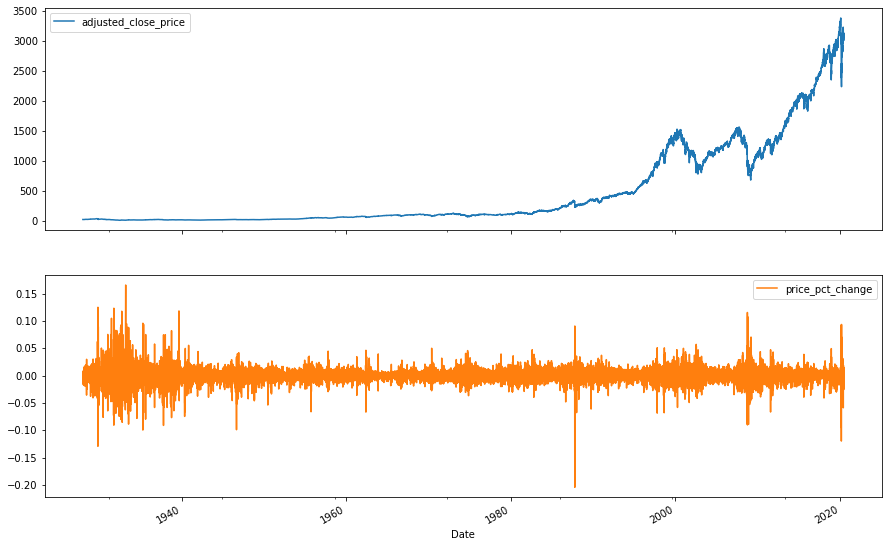

In [9]:
sp500.plot(subplots=True, figsize=(15,10));

## The dot.com crash

### Start date (has to be added manually)

In [10]:
start_date = '2000-03-27'

### Start price

In [11]:
start_price = sp500.loc[start_date]['adjusted_close_price']
start_price

1523.859985

### End date

In [12]:
end = sp500.loc[start_date:][sp500['adjusted_close_price'] > start_price].reset_index().head(1)
end_date = end['Date'].dt.strftime('%Y-%m-%d')
end_date = end_date[0]
end_date

<ipython-input-12-6cd7dd5f5aac>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500['adjusted_close_price'] > start_price].reset_index().head(1)


'2007-05-21'

### End price

In [13]:
end_price = end.iloc[0]['adjusted_close_price']
end_price

1525.099976

### Days of recovery

In [14]:
timeframe = pd.to_datetime(end_date) - pd.to_datetime(start_date)
days_of_recovery = timeframe / np.timedelta64(1, 'D')

In [15]:
days_of_recovery

2611.0

### Months of recovery

In [16]:
months_of_recovery = timeframe / np.timedelta64(1, 'M')

In [17]:
months_of_recovery

85.78410234296392

### Years of recovery

In [18]:
years_of_recovery = timeframe / np.timedelta64(1, 'Y')

In [19]:
years_of_recovery

7.148675195246994

### Lowest price between end date and start date

In [20]:
lowest_price = sp500[start_date:end_date].min()['adjusted_close_price']
lowest_price

776.76001

### Lowest date

In [21]:
sp500.head()

,adjusted_close_price,price_pct_change
Date,,
1927-12-30,17.660000,NaN
1928-01-03,17.760000,0.005663
1928-01-04,17.719999,-0.002252
1928-01-05,17.549999,-0.009594
1928-01-06,17.660000,0.006268


In [22]:
lowest_date = sp500[start_date:end_date][sp500['adjusted_close_price'] == lowest_price]
lowest_date = lowest_date.reset_index()
lowest_date = lowest_date['Date'].dt.strftime('%Y-%m-%d')[0]
lowest_date

<ipython-input-22-045d65ff95a4>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500['adjusted_close_price'] == lowest_price]


'2002-10-09'

### Percentage lossbetween start price and lowest price

In [23]:
pct_loss = (lowest_price - start_price) / start_price
pct_loss

-0.49026812328824293

### Plot

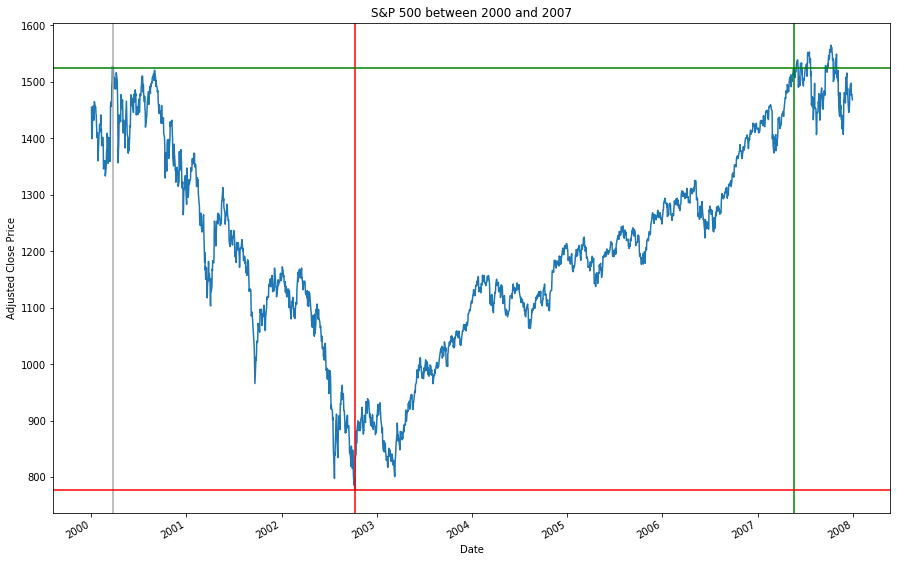

In [24]:
plot_periode = sp500[start_date[0:4]:end_date[0:4]]
plot = plot_periode['adjusted_close_price'].plot(kind='line', figsize=(15,10))
plot.axvline(start_date, color='darkgrey')
plot.axvline(lowest_date, color='r')
plot.axvline(end_date, color='g')
plot.axhline(start_price, color='g')
plot.axhline(lowest_price, color='r')
plt.ylabel('Adjusted Close Price')
plt.title(f'S&P 500 between {start_date[0:4]} and {end_date[0:4]}');

In [25]:
dictionary = {'year': start_date[0:4], 
              'start_date': start_date,
              'lowest_date': lowest_date,
              'end_date': end_date,
              'start_price': start_price,
              'lowest_price': lowest_price,
              'end_price': end_price,
              'days_of_recovery': days_of_recovery,
              'months_of_recovery': months_of_recovery,
              'years_of_recovery': years_of_recovery,
              'percentage_loss': pct_loss}

In [26]:
dictionary

{'year': '2000',
 'start_date': '2000-03-27',
 'lowest_date': '2002-10-09',
 'end_date': '2007-05-21',
 'start_price': 1523.859985,
 'lowest_price': 776.76001,
 'end_price': 1525.099976,
 'days_of_recovery': 2611.0,
 'months_of_recovery': 85.78410234296392,
 'years_of_recovery': 7.148675195246994,
 'percentage_loss': -0.49026812328824293}

In [27]:
df = pd.DataFrame([dictionary])
df

,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,percentage_loss
0,2000,2000-03-27,2002-10-09,2007-05-21,1523.859985,776.76001,1525.099976,2611.0,85.784102,7.148675,-0.490268


In [28]:
df2 = pd.DataFrame([dictionary])

In [29]:
df2

,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,percentage_loss
0,2000,2000-03-27,2002-10-09,2007-05-21,1523.859985,776.76001,1525.099976,2611.0,85.784102,7.148675,-0.490268


In [30]:
df3 = pd.concat([df, df2]).reset_index(drop=True)

In [31]:
df3

,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,percentage_loss
0,2000,2000-03-27,2002-10-09,2007-05-21,1523.859985,776.76001,1525.099976,2611.0,85.784102,7.148675,-0.490268
1,2000,2000-03-27,2002-10-09,2007-05-21,1523.859985,776.76001,1525.099976,2611.0,85.784102,7.148675,-0.490268


In [32]:
sp500 = pd.read_csv('Data/^GSPC (S&P 500 max).csv', parse_dates=True, index_col='Date')
sp500.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0


In [33]:
#start_date = '2000-03-27'

In [34]:
def create_df(start_date, column):
    start_price = sp500.loc[start_date][column]
    
    end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
    end_date = end['Date'].dt.strftime('%Y-%m-%d')
    end_date = end_date[0]

    end_price = end.iloc[0][column]
    
    timeframe = pd.to_datetime(end_date) - pd.to_datetime(start_date)
    days_of_recovery = timeframe / np.timedelta64(1, 'D')
    months_of_recovery = timeframe / np.timedelta64(1, 'M')
    years_of_recovery = timeframe / np.timedelta64(1, 'Y')
    
    lowest_price = sp500[start_date:end_date].min()[column]
    
    lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]
    lowest_date = lowest_date.reset_index()
    lowest_date = lowest_date['Date'].dt.strftime('%Y-%m-%d')[0]
    
    abs_pct_loss = abs((lowest_price - start_price) / start_price)
    
    dictionary = {'year': start_date[0:4], 
              'start_date': start_date,
              'lowest_date': lowest_date,
              'end_date': end_date,
              'start_price': start_price,
              'lowest_price': lowest_price,
              'end_price': end_price,
              'days_of_recovery': days_of_recovery,
              'months_of_recovery': months_of_recovery,
              'years_of_recovery': years_of_recovery,
              'abs_percentage_loss': abs_pct_loss}
    
    df = pd.DataFrame([dictionary])
    return df

In [35]:
def create_plot(start_date, column):
    start_price = sp500.loc[start_date][column]
    
    end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
    end_date = end['Date'].dt.strftime('%Y-%m-%d')
    end_date = end_date[0]

    end_price = end.iloc[0][column]
    
    timeframe = pd.to_datetime(end_date) - pd.to_datetime(start_date)
    days_of_recovery = timeframe / np.timedelta64(1, 'D')
    months_of_recovery = timeframe / np.timedelta64(1, 'M')
    years_of_recovery = timeframe / np.timedelta64(1, 'Y')
    
    lowest_price = sp500[start_date:end_date].min()[column]
    
    lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]
    lowest_date = lowest_date.reset_index()
    lowest_date = lowest_date['Date'].dt.strftime('%Y-%m-%d')[0]
    
    plot_periode = sp500[start_date[0:4]:end_date[0:4]]
    plot = plot_periode[column].plot(kind='line', figsize=(15,10))
    plot.axvline(start_date, color='darkgrey')
    plot.axvline(lowest_date, color='r')
    plot.axvline(end_date, color='g')
    plot.axhline(start_price, color='g')
    plot.axhline(lowest_price, color='r')
    plt.ylabel('Adjusted Close Price')
    plt.title(f'S&P 500 between {start_date[0:4]} and {end_date[0:4]}');

In [36]:
first = create_df('2007-10-9', 'Adj Close')
first

<ipython-input-34-3df627dc20d6>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-34-3df627dc20d6>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss
0,2007,2007-10-9,2009-03-09,2013-03-28,1565.150024,676.530029,1569.189941,1997.0,65.611204,5.4676,0.567754


<ipython-input-35-1fd52ce5935e>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-35-1fd52ce5935e>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


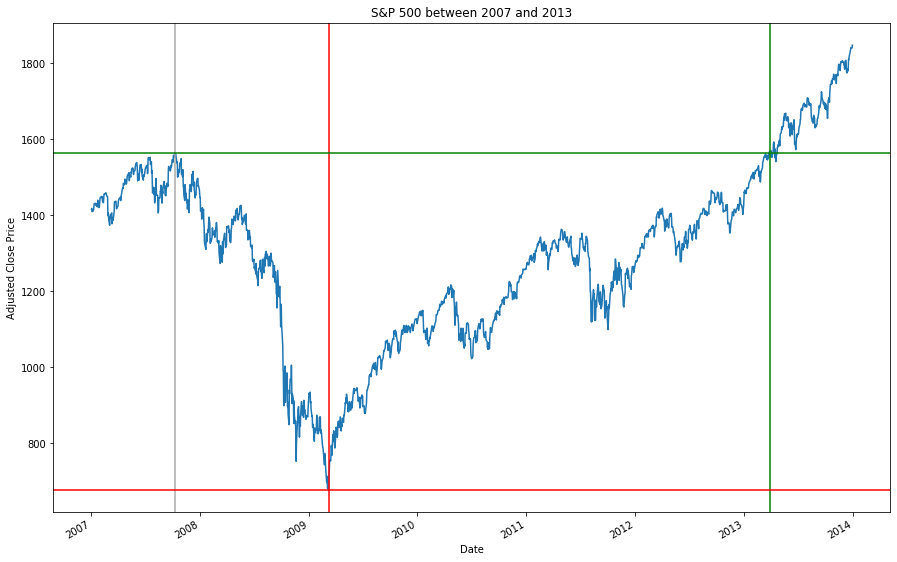

In [37]:
create_plot('2007-10-9', 'Adj Close')

In [38]:
second = create_df('2000-03-24', 'Adj Close')
second

<ipython-input-34-3df627dc20d6>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-34-3df627dc20d6>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss
0,2000,2000-03-24,2002-10-09,2007-05-30,1527.459961,776.76001,1530.22998,2623.0,86.178361,7.18153,0.491469


<ipython-input-35-1fd52ce5935e>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-35-1fd52ce5935e>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


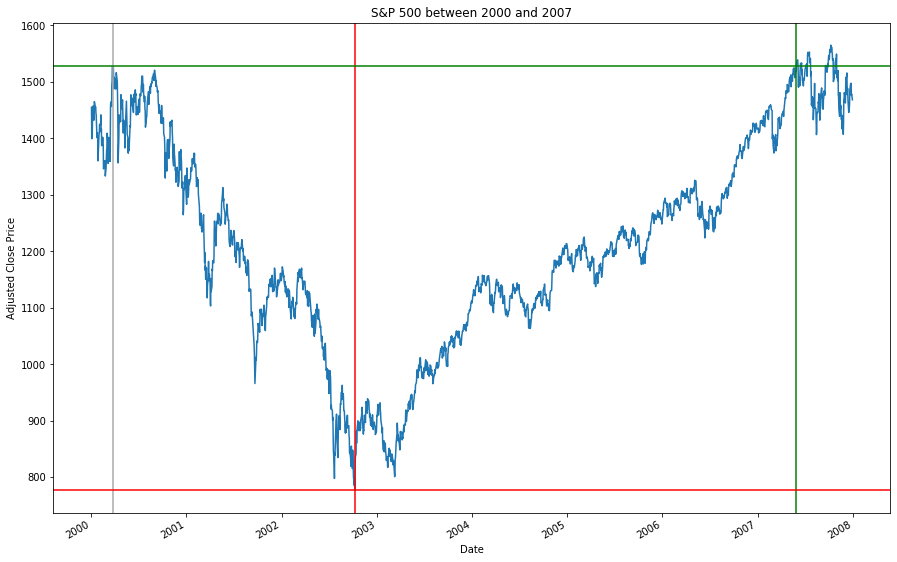

In [39]:
create_plot('2000-03-24', 'Adj Close')

In [40]:
third = create_df('1990-07-16', 'Adj Close')
third

<ipython-input-34-3df627dc20d6>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-34-3df627dc20d6>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss
0,1990,1990-07-16,1990-10-11,1991-02-13,368.950012,295.459991,369.019989,212.0,6.965235,0.580436,0.199187


<ipython-input-35-1fd52ce5935e>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-35-1fd52ce5935e>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


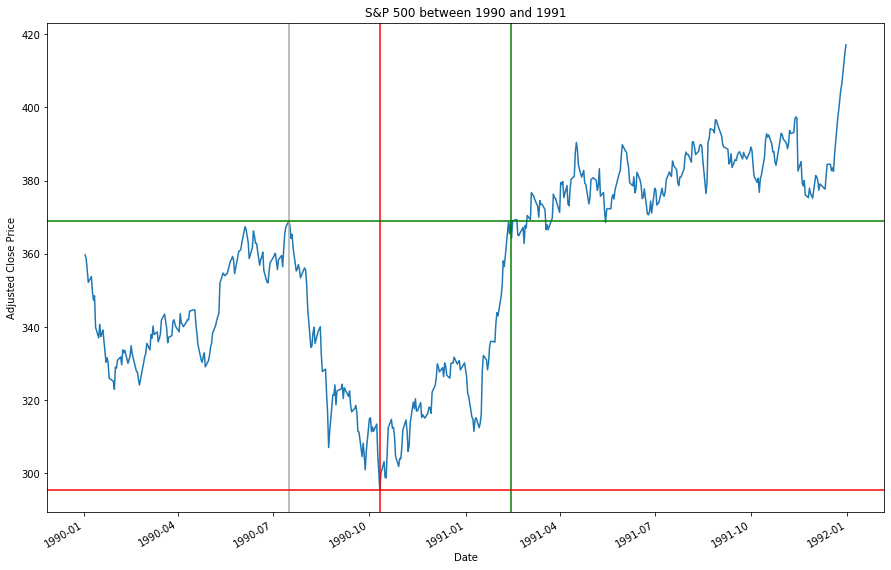

In [41]:
create_plot('1990-07-16', 'Adj Close')

In [42]:
fourth = create_df('1987-08-25', 'Adj Close')
fourth

<ipython-input-34-3df627dc20d6>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-34-3df627dc20d6>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss
0,1987,1987-08-25,1987-12-04,1989-07-26,336.769989,223.919998,338.049988,701.0,23.031274,1.919273,0.335095


<ipython-input-35-1fd52ce5935e>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-35-1fd52ce5935e>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


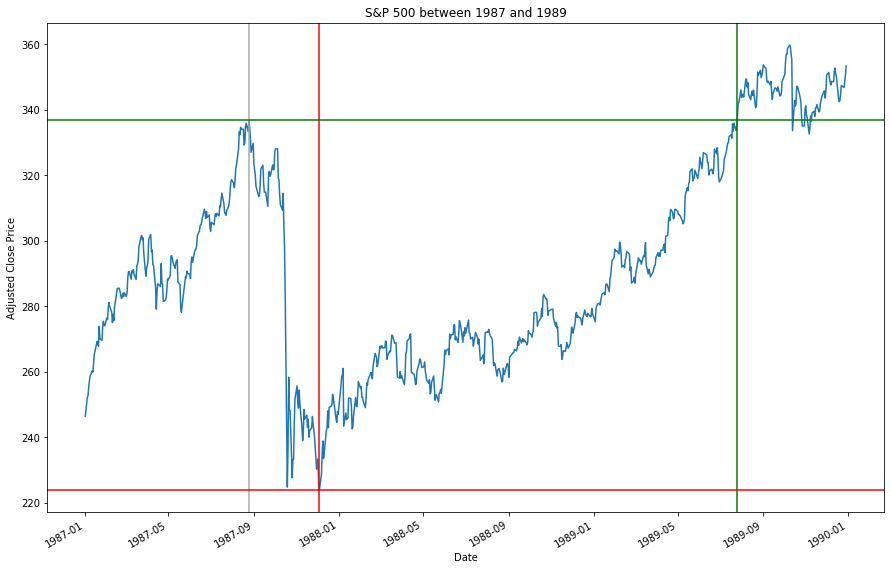

In [43]:
create_plot('1987-08-25', 'Adj Close')

In [44]:
fifth = create_df('1980-11-28', 'Adj Close')
fifth

<ipython-input-34-3df627dc20d6>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-34-3df627dc20d6>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss
0,1980,1980-11-28,1982-08-12,1982-11-03,140.520004,102.419998,142.869995,705.0,23.162693,1.930224,0.271136


<ipython-input-35-1fd52ce5935e>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-35-1fd52ce5935e>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


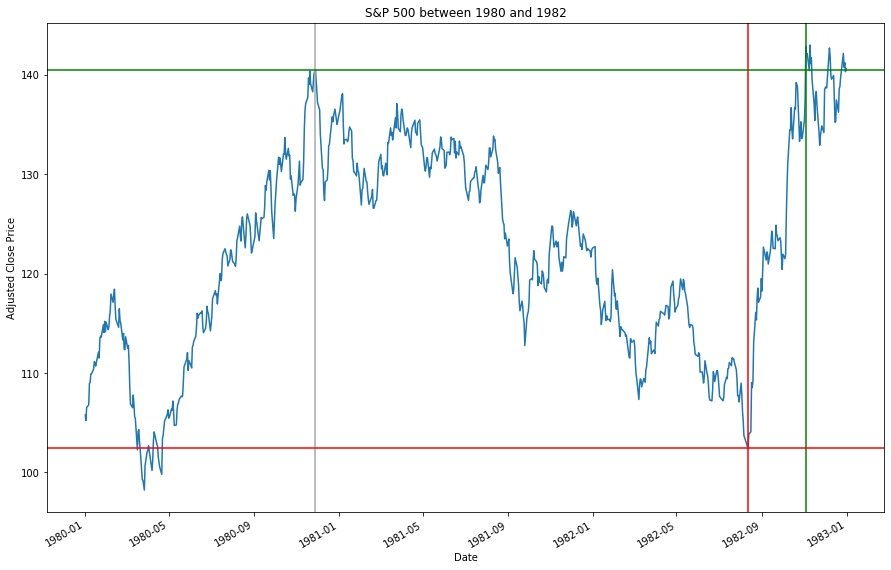

In [45]:
create_plot('1980-11-28', 'Adj Close')

In [46]:
sixth = create_df('1973-01-11', 'Adj Close')
sixth

<ipython-input-34-3df627dc20d6>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-34-3df627dc20d6>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss
0,1973,1973-01-11,1974-10-03,1980-07-17,120.239998,62.279999,121.440002,2744.0,90.153802,7.512817,0.482036


In [47]:
seventh = create_df('1968-11-29', 'Adj Close')
seventh

<ipython-input-34-3df627dc20d6>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-34-3df627dc20d6>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss
0,1968,1968-11-29,1970-05-26,1972-03-06,108.370003,69.290001,108.769997,1193.0,39.195877,3.266323,0.360616


In [48]:
eighth = create_df('1966-02-09', 'Adj Close')
eighth

<ipython-input-34-3df627dc20d6>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-34-3df627dc20d6>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss
0,1966,1966-02-09,1966-10-07,1967-05-04,94.059998,73.199997,94.32,449.0,14.751843,1.22932,0.221773


In [49]:
ninth = create_df('1961-12-12', 'Adj Close')
ninth

<ipython-input-34-3df627dc20d6>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-34-3df627dc20d6>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss
0,1961,1961-12-12,1962-06-26,1963-09-03,72.639999,52.32,72.660004,630.0,20.698577,1.724881,0.279736


In [50]:
tenth = create_df('1956-08-02', 'Adj Close')
tenth

<ipython-input-34-3df627dc20d6>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-34-3df627dc20d6>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss
0,1956,1956-08-02,1957-10-22,1958-09-24,49.639999,38.98,49.779999,783.0,25.725374,2.143781,0.214746


In [51]:
eleventh = create_df('1946-05-29', 'Adj Close')
eleventh

<ipython-input-34-3df627dc20d6>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-34-3df627dc20d6>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss
0,1946,1946-05-29,1949-06-13,1950-06-09,19.25,13.55,19.26,1472.0,48.362389,4.030199,0.296104


In [52]:
twelfth = create_df('1941-01-10', 'Adj Close')
twelfth

<ipython-input-34-3df627dc20d6>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-34-3df627dc20d6>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss
0,1941,1941-01-10,1942-04-28,1943-02-24,10.86,7.47,10.9,775.0,25.462535,2.121878,0.312155


In [53]:
thirteenth = create_df('1937-03-10', 'Adj Close')
thirteenth

<ipython-input-34-3df627dc20d6>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-34-3df627dc20d6>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss
0,1937,1937-03-10,1942-04-28,1946-02-05,18.67,7.47,18.700001,3254.0,106.909793,8.909149,0.599893


<ipython-input-35-1fd52ce5935e>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-35-1fd52ce5935e>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


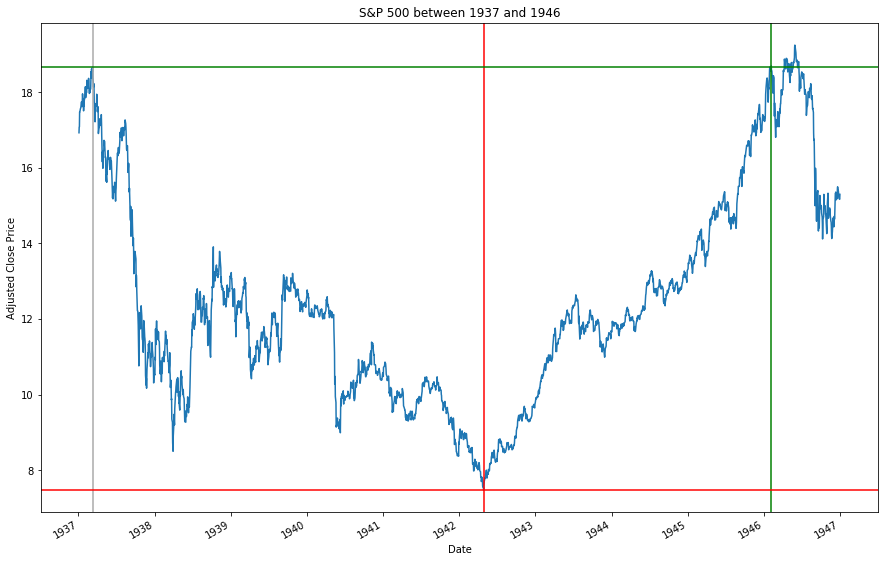

In [54]:
create_plot('1937-03-10', 'Adj Close')

In [55]:
fourteenth = create_df('1929-09-16', 'Adj Close')
fourteenth

<ipython-input-34-3df627dc20d6>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-34-3df627dc20d6>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss
0,1929,1929-09-16,1932-06-01,1954-09-22,31.860001,4.4,32.0,9137.0,300.195076,25.016256,0.861896


<ipython-input-35-1fd52ce5935e>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-35-1fd52ce5935e>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


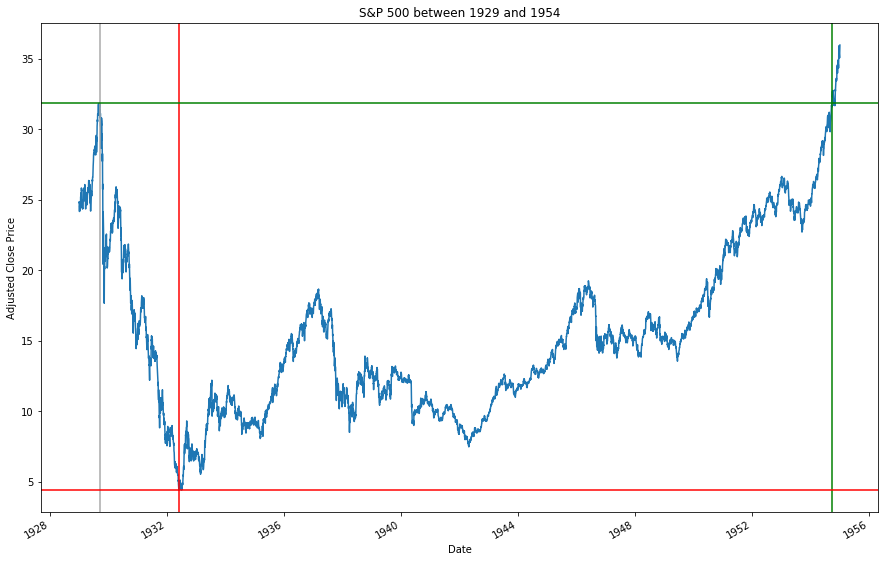

In [56]:
create_plot('1929-09-16', 'Adj Close')

In [57]:
fifteenth = create_df('2009-01-06', 'Adj Close')
fifteenth

<ipython-input-34-3df627dc20d6>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-34-3df627dc20d6>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss
0,2009,2009-01-06,2009-03-09,2009-06-01,934.700012,676.530029,942.869995,146.0,4.796813,0.399734,0.276206


In [58]:
sixteenth = create_df('2002-01-04', 'Adj Close')
sixteenth

<ipython-input-34-3df627dc20d6>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-34-3df627dc20d6>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss
0,2002,2002-01-04,2002-10-09,2004-11-11,1172.51001,776.76001,1173.47998,1042.0,34.234789,2.852899,0.337524


In [59]:
seventeenth = create_df('1948-06-15', 'Adj Close')
seventeenth

<ipython-input-34-3df627dc20d6>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-34-3df627dc20d6>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss
0,1948,1948-06-15,1949-06-13,1950-01-09,17.059999,13.55,17.08,573.0,18.825849,1.568821,0.205744


In [60]:
eighteenth = create_df('1940-11-07', 'Adj Close')
eighteenth

<ipython-input-34-3df627dc20d6>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-34-3df627dc20d6>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss
0,1940,1940-11-07,1942-04-28,1943-03-29,11.39,7.47,11.49,872.0,28.649459,2.387455,0.344162


In [61]:
nineteenth = create_df('1939-10-25', 'Adj Close')
nineteenth

<ipython-input-34-3df627dc20d6>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-34-3df627dc20d6>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss
0,1939,1939-10-25,1942-04-28,1944-07-10,13.21,7.47,13.27,1720.0,56.510401,4.7092,0.434519


<ipython-input-35-1fd52ce5935e>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-35-1fd52ce5935e>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


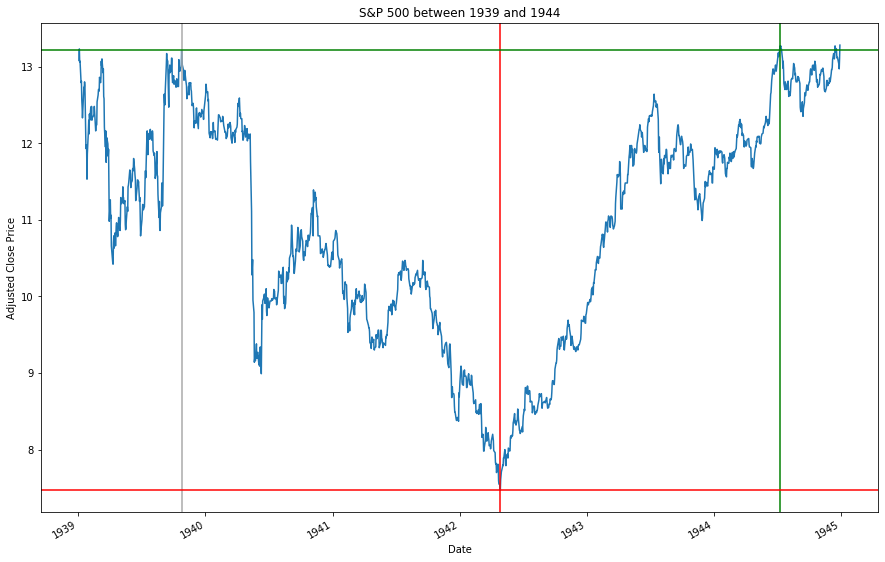

In [62]:
create_plot('1939-10-25', 'Adj Close')

In [63]:
twentieth = create_df('1938-11-09', 'Adj Close')
twentieth

<ipython-input-34-3df627dc20d6>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-34-3df627dc20d6>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss
0,1938,1938-11-09,1942-04-28,1945-02-13,13.79,7.47,13.9,2288.0,75.171975,6.264331,0.458303


In [64]:
twenty_first = create_df('1934-02-06', 'Adj Close')
twenty_first

<ipython-input-34-3df627dc20d6>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-34-3df627dc20d6>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss
0,1934,1934-02-06,1935-03-14,1935-09-10,11.82,8.06,11.86,581.0,19.088688,1.590724,0.318105


In [65]:
twenty_second = create_df('1933-07-18', 'Adj Close')
twenty_second

<ipython-input-34-3df627dc20d6>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-34-3df627dc20d6>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss
0,1933,1933-07-18,1935-03-14,1935-10-22,12.2,8.06,12.25,826.0,27.138134,2.261511,0.339344


<ipython-input-35-1fd52ce5935e>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-35-1fd52ce5935e>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


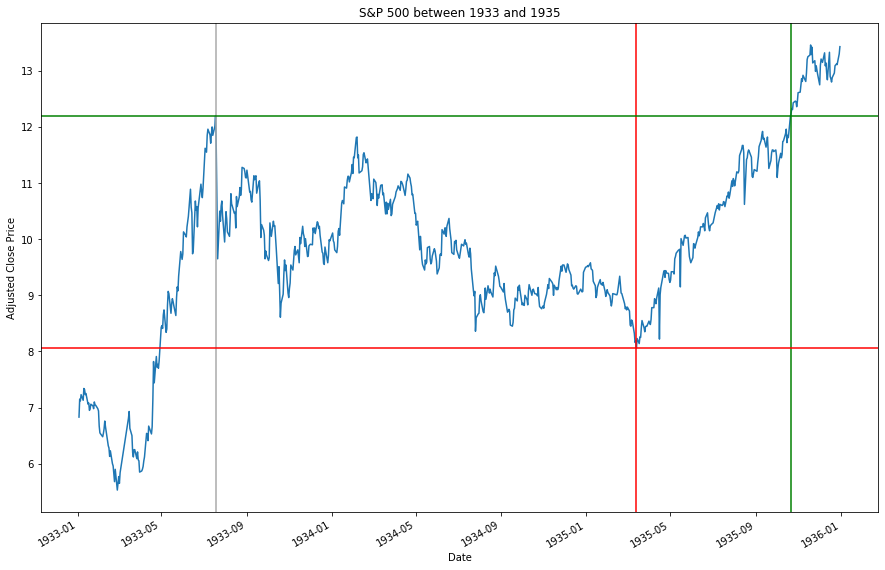

In [66]:
create_plot('1933-07-18', 'Adj Close')

In [67]:
twenthy_third = create_df('1932-09-07', 'Adj Close')
twenthy_third

<ipython-input-34-3df627dc20d6>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-34-3df627dc20d6>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss
0,1932,1932-09-07,1933-02-27,1933-05-26,9.31,5.53,9.34,261.0,8.575125,0.714594,0.406015


In [68]:
twenty_fourth = create_df('1931-11-09', 'Adj Close')
twenty_fourth

<ipython-input-34-3df627dc20d6>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-34-3df627dc20d6>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss
0,1931,1931-11-09,1932-06-01,1933-07-03,11.52,4.4,11.62,602.0,19.77864,1.64822,0.618056


In [69]:
twenty_fifth = create_df('1931-06-26', 'Adj Close')
twenty_fifth

<ipython-input-34-3df627dc20d6>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-34-3df627dc20d6>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss
0,1931,1931-06-26,1932-06-01,1936-04-06,15.35,4.4,15.51,1746.0,57.364628,4.780386,0.713355


In [70]:
twenty_sixth = create_df('1931-02-24', 'Adj Close')
twenty_sixth

<ipython-input-34-3df627dc20d6>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-34-3df627dc20d6>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss
0,1931,1931-02-24,1932-06-01,1937-02-11,18.17,4.4,18.32,2179.0,71.590792,5.965899,0.757843


<ipython-input-35-1fd52ce5935e>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-35-1fd52ce5935e>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


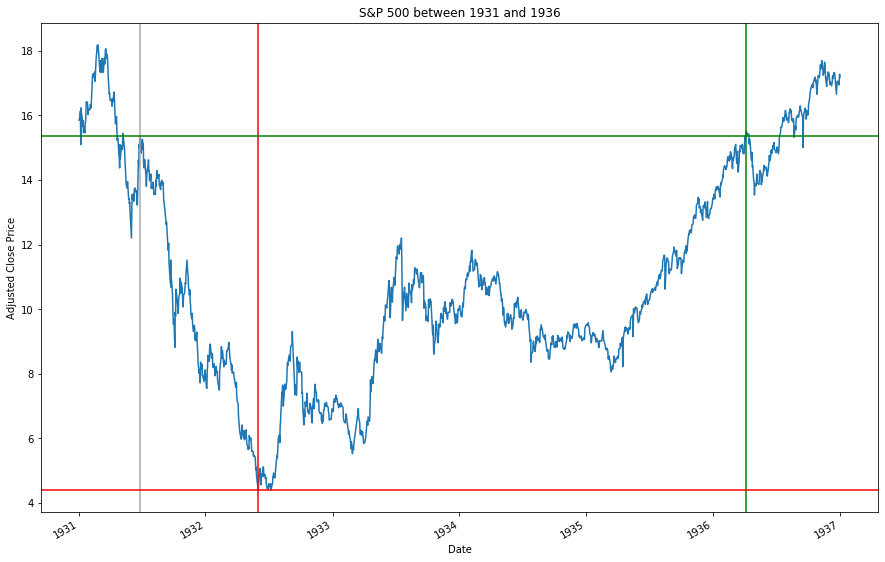

In [71]:
create_plot('1931-06-26', 'Adj Close')

In [72]:
twenty_seventh = create_df('1930-04-10', 'Adj Close')
twenty_seventh

<ipython-input-34-3df627dc20d6>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  end = sp500.loc[start_date:][sp500[column] > start_price].reset_index().head(1)
<ipython-input-34-3df627dc20d6>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lowest_date = sp500[start_date:end_date][sp500[column] == lowest_price]


,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss
0,1930,1930-04-10,1932-06-01,1952-12-09,25.92,4.4,25.93,8279.0,272.005585,22.667132,0.830247


In [73]:
all_recessions_df = (pd.concat([first, 
                                second, 
                                third, 
                                fourth, 
                                fifth, 
                                sixth, 
                                seventh, 
                                eighth, 
                                ninth, 
                                tenth, 
                                eleventh, 
                                twelfth, 
                                thirteenth, 
                                fourteenth, 
                                fifteenth, # 95%
                                sixteenth, # 94.8%
                                seventeenth, # 95%
                                eighteenth, # 95.1%
                                nineteenth, # 95.1%
                                twentieth, # 94.8#
                                twenty_first, # 94.8%
                                twenty_second, # 94.9%
                                twenthy_third, # 93.4%
                                twenty_fourth, # 81%
                                twenty_fifth, # 69%
                                twenty_sixth, # 59.6%
                                twenty_seventh]).reset_index(drop=True)) #fourteenth (great depression is out)

In [74]:
all_recessions_df.sort_values(by=['start_date'])

,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss
13,1929,1929-09-16,1932-06-01,1954-09-22,31.860001,4.400000,32.000000,9137.0,300.195076,25.016256,0.861896
26,1930,1930-04-10,1932-06-01,1952-12-09,25.920000,4.400000,25.930000,8279.0,272.005585,22.667132,0.830247
25,1931,1931-02-24,1932-06-01,1937-02-11,18.170000,4.400000,18.320000,2179.0,71.590792,5.965899,0.757843
24,1931,1931-06-26,1932-06-01,1936-04-06,15.350000,4.400000,15.510000,1746.0,57.364628,4.780386,0.713355
23,1931,1931-11-09,1932-06-01,1933-07-03,11.520000,4.400000,11.620000,602.0,19.778640,1.648220,0.618056
22,1932,1932-09-07,1933-02-27,1933-05-26,9.310000,5.530000,9.340000,261.0,8.575125,0.714594,0.406015
21,1933,1933-07-18,1935-03-14,1935-10-22,12.200000,8.060000,12.250000,826.0,27.138134,2.261511,0.339344
20,1934,1934-02-06,1935-03-14,1935-09-10,11.820000,8.060000,11.860000,581.0,19.088688,1.590724,0.318105
12,1937,1937-03-10,1942-04-28,1946-02-05,18.670000,7.470000,18.700001,3254.0,106.909793,8.909149,0.599893
19,1938,1938-11-09,1942-04-28,1945-02-13,13.790000,7.470000,13.900000,2288.0,75.171975,6.264331,0.458303


## I cannot find any data in yahoo finance before December 1940 

### Check the downloaded sp500 DataFrame before 1940

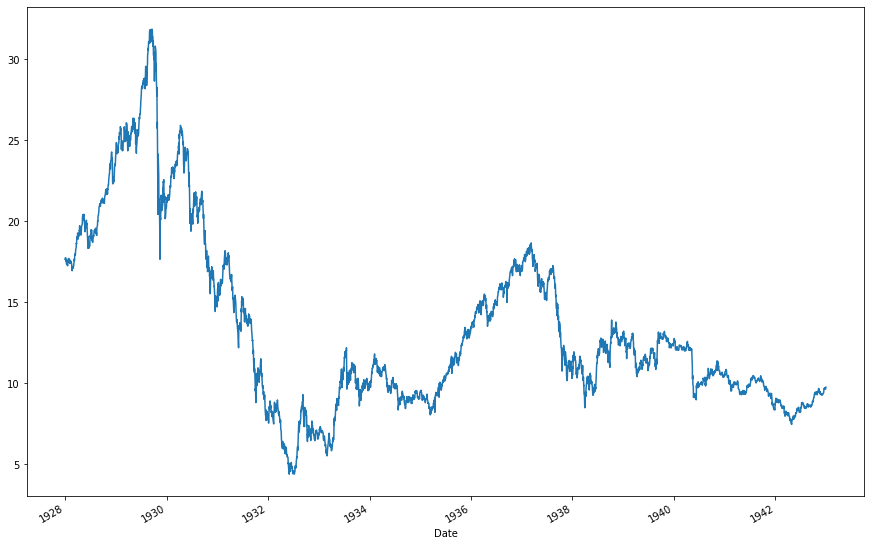

In [75]:
sp500_1927_42_plot = sp500['1927':'1942']['Adj Close'].plot(figsize=(15,10))
sp500_1927_42_plot;

In [76]:
sp500_1927_42 = sp500['1927':'1942']

In [77]:
sp500_1927_42_max = sp500_1927_42['Adj Close'].max()

In [78]:
sp500_1927_42[sp500_1927_42['Adj Close'] == sp500_1927_42_max]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1929-09-16,31.860001,31.860001,31.860001,31.860001,31.860001,0


In [79]:
sp500_1936_38 = sp500['1936':'1938']

In [80]:
sp500_1936_38_max = sp500_1936_38['Adj Close'].max()

In [81]:
sp500_1936_38[sp500_1936_38['Adj Close'] == sp500_1936_38_max]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1937-03-10,18.67,18.67,18.67,18.67,18.67,0


### Save the new DataFrame

In [82]:
all_recessions_df.to_csv('Data/all_recessions_df.csv', index=None)

In [83]:
check = pd.read_csv('Data/all_recessions_df.csv')
check.head()

,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss
0,2007,2007-10-9,2009-03-09,2013-03-28,1565.150024,676.530029,1569.189941,1997.0,65.611204,5.467600,0.567754
1,2000,2000-03-24,2002-10-09,2007-05-30,1527.459961,776.760010,1530.229980,2623.0,86.178361,7.181530,0.491469
2,1990,1990-07-16,1990-10-11,1991-02-13,368.950012,295.459991,369.019989,212.0,6.965235,0.580436,0.199187
3,1987,1987-08-25,1987-12-04,1989-07-26,336.769989,223.919998,338.049988,701.0,23.031274,1.919273,0.335095
4,1980,1980-11-28,1982-08-12,1982-11-03,140.520004,102.419998,142.869995,705.0,23.162693,1.930224,0.271136


## Regression analysis

In [84]:
all_recessions_df.tail()

,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss
22,1932,1932-09-07,1933-02-27,1933-05-26,9.31,5.53,9.34,261.0,8.575125,0.714594,0.406015
23,1931,1931-11-09,1932-06-01,1933-07-03,11.52,4.40,11.62,602.0,19.778640,1.648220,0.618056
24,1931,1931-06-26,1932-06-01,1936-04-06,15.35,4.40,15.51,1746.0,57.364628,4.780386,0.713355
25,1931,1931-02-24,1932-06-01,1937-02-11,18.17,4.40,18.32,2179.0,71.590792,5.965899,0.757843
26,1930,1930-04-10,1932-06-01,1952-12-09,25.92,4.40,25.93,8279.0,272.005585,22.667132,0.830247


#### Create a constant

In [85]:
all_recessions_df = sm.add_constant(all_recessions_df)
all_recessions_df.head()

,const,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss
0,1.0,2007,2007-10-9,2009-03-09,2013-03-28,1565.150024,676.530029,1569.189941,1997.0,65.611204,5.467600,0.567754
1,1.0,2000,2000-03-24,2002-10-09,2007-05-30,1527.459961,776.760010,1530.229980,2623.0,86.178361,7.181530,0.491469
2,1.0,1990,1990-07-16,1990-10-11,1991-02-13,368.950012,295.459991,369.019989,212.0,6.965235,0.580436,0.199187
3,1.0,1987,1987-08-25,1987-12-04,1989-07-26,336.769989,223.919998,338.049988,701.0,23.031274,1.919273,0.335095
4,1.0,1980,1980-11-28,1982-08-12,1982-11-03,140.520004,102.419998,142.869995,705.0,23.162693,1.930224,0.271136


### Run OLS to estimate the regression coefficients

### Model 1

In [86]:
y = all_recessions_df['days_of_recovery']
X = all_recessions_df[['const', 'abs_percentage_loss']]

lin_reg_model = sm.OLS(y,X)
results = lin_reg_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       days_of_recovery   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     38.52
Date:                Thu, 09 Jul 2020   Prob (F-statistic):           1.72e-06
Time:                        19:15:24   Log-Likelihood:                -232.65
No. Observations:                  27   AIC:                             469.3
Df Residuals:                      25   BIC:                             471.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1963.5113    658.212     -2.983      0.006   -3319.124    -607.898
abs_percentage_loss  8740.5395   1408.216      6.207      0.000    5840.265    1.16e+04
==============================================================================
Omnibus:                        4.120   Durbin-Watson:                   1.402
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                2.944
Skew:                           0.255   Prob(JB):                        0.229
Kurtosis:                       4.535   Cond. No.                         6.26
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Plot the results

In [87]:
predictions1 = results.predict(X)

In [88]:
all_recessions_df = all_recessions_df.assign(pred_days_of_recovery1=predictions1)
all_recessions_df.head()

,const,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss,pred_days_of_recovery1
0,1.0,2007,2007-10-9,2009-03-09,2013-03-28,1565.150024,676.530029,1569.189941,1997.0,65.611204,5.467600,0.567754,2998.963862
1,1.0,2000,2000-03-24,2002-10-09,2007-05-30,1527.459961,776.760010,1530.229980,2623.0,86.178361,7.181530,0.491469,2332.197064
2,1.0,1990,1990-07-16,1990-10-11,1991-02-13,368.950012,295.459991,369.019989,212.0,6.965235,0.580436,0.199187,-222.510077
3,1.0,1987,1987-08-25,1987-12-04,1989-07-26,336.769989,223.919998,338.049988,701.0,23.031274,1.919273,0.335095,965.401094
4,1.0,1980,1980-11-28,1982-08-12,1982-11-03,140.520004,102.419998,142.869995,705.0,23.162693,1.930224,0.271136,406.361987


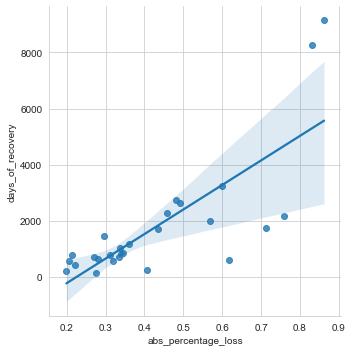

In [89]:
sns.set_style('whitegrid')
sns.lmplot(x ='abs_percentage_loss', y ='days_of_recovery', data = all_recessions_df);

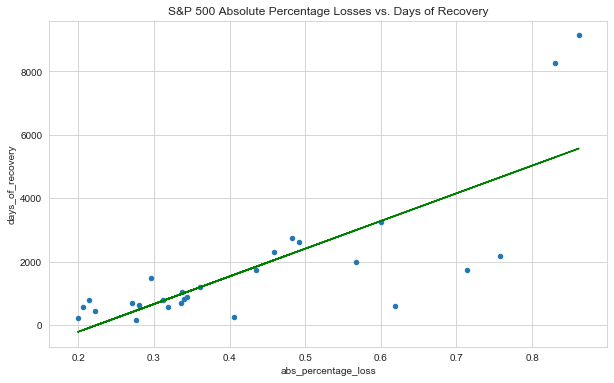

In [90]:
all_recessions_df.plot(kind='scatter', x='abs_percentage_loss', y='days_of_recovery', figsize=(10,6))
plt.plot(all_recessions_df['abs_percentage_loss'], all_recessions_df['pred_days_of_recovery1'], color='green')
plt.title(f'S&P 500 Absolute Percentage Losses vs. Days of Recovery');

### Make a prediction for the days of recovery of S&P 500 in the Covid-19 situation 

**prediction 1 (with the linear regression model)**

$y = b_0 + b_1 * x_1$

In [91]:
results.params

const                 -1963.511322
abs_percentage_loss    8740.539485
dtype: float64

In [92]:
beta0 = results.params[0] # intercept
beta0

-1963.5113218331903

In [93]:
beta1 = results.params[1] # slope
beta1

8740.539484578085

In [94]:
def lin_reg_model(x):
    y = beta0 + beta1 * x
    return y

In [95]:
covid_recovery = lin_reg_model(0.339)
covid_recovery

999.5315634387807

In [96]:
print(f'''The recovery of the S&P 500 stock price recession will take: 
 - in days: {round(covid_recovery, 2)} days, 
 - in months: {round(covid_recovery / 30, 2)} months, 
 - in years: {round(covid_recovery / 365, 2)} years''')

The recovery of the S&P 500 stock price recession will take: 
 - in days: 999.53 days, 
 - in months: 33.32 months, 
 - in years: 2.74 years


**confidence intervall or prediction interval???**

In [97]:
results.conf_int()

,0,1
const,-3319.124478,-607.898165
abs_percentage_loss,5840.264645,11640.814324


In [98]:
t_crit = 2.16 # https://www.stat.colostate.edu/inmem/gumina/st201/pdf/Utts-Heckard_t-Table.pdf

In [99]:
from scipy.stats import sem

In [100]:
se = sem(all_recessions_df['pred_days_of_recovery1']) # standard error
se

325.3050328659093

In [101]:
lower_ci = covid_recovery - t_crit * se
lower_ci

296.8726924484166

In [102]:
higher_ci = covid_recovery + t_crit * se
higher_ci

1702.1904344291447

### Model 2 (Quadratic line / Polynomial Linear Regression)

In [103]:
all_recessions_df.head()

,const,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss,pred_days_of_recovery1
0,1.0,2007,2007-10-9,2009-03-09,2013-03-28,1565.150024,676.530029,1569.189941,1997.0,65.611204,5.467600,0.567754,2998.963862
1,1.0,2000,2000-03-24,2002-10-09,2007-05-30,1527.459961,776.760010,1530.229980,2623.0,86.178361,7.181530,0.491469,2332.197064
2,1.0,1990,1990-07-16,1990-10-11,1991-02-13,368.950012,295.459991,369.019989,212.0,6.965235,0.580436,0.199187,-222.510077
3,1.0,1987,1987-08-25,1987-12-04,1989-07-26,336.769989,223.919998,338.049988,701.0,23.031274,1.919273,0.335095,965.401094
4,1.0,1980,1980-11-28,1982-08-12,1982-11-03,140.520004,102.419998,142.869995,705.0,23.162693,1.930224,0.271136,406.361987


In [104]:
abs_perc_loss_squared = all_recessions_df['abs_percentage_loss'] ** 2
all_recessions_df = all_recessions_df.assign(abs_per_loss_squared=abs_perc_loss_squared)
all_recessions_df.head()

,const,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss,pred_days_of_recovery1,abs_per_loss_squared
0,1.0,2007,2007-10-9,2009-03-09,2013-03-28,1565.150024,676.530029,1569.189941,1997.0,65.611204,5.467600,0.567754,2998.963862,0.322344
1,1.0,2000,2000-03-24,2002-10-09,2007-05-30,1527.459961,776.760010,1530.229980,2623.0,86.178361,7.181530,0.491469,2332.197064,0.241542
2,1.0,1990,1990-07-16,1990-10-11,1991-02-13,368.950012,295.459991,369.019989,212.0,6.965235,0.580436,0.199187,-222.510077,0.039675
3,1.0,1987,1987-08-25,1987-12-04,1989-07-26,336.769989,223.919998,338.049988,701.0,23.031274,1.919273,0.335095,965.401094,0.112289
4,1.0,1980,1980-11-28,1982-08-12,1982-11-03,140.520004,102.419998,142.869995,705.0,23.162693,1.930224,0.271136,406.361987,0.073515


In [105]:
y = all_recessions_df['days_of_recovery']
X = all_recessions_df[['const', 'abs_percentage_loss', 'abs_per_loss_squared']]

quad_reg_model = sm.OLS(y,X)
results_q = quad_reg_model.fit()
results_q.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       days_of_recovery   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     31.77
Date:                Thu, 09 Jul 2020   Prob (F-statistic):           1.80e-07
Time:                        19:15:29   Log-Likelihood:                -227.77
No. Observations:                  27   AIC:                             461.5
Df Residuals:                      24   BIC:                             465.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2668.4862   1538.665      1.734      0.096    -507.163    5844.135
abs_percentage_loss  -1.297e+04   6820.997     -1.901      0.069    -2.7e+04    1111.916
abs_per_loss_squared  2.124e+04   6569.783      3.233      0.004    7678.700    3.48e+04
==============================================================================
Omnibus:                        5.544   Durbin-Watson:                   1.375
Prob(Omnibus):                  0.063   Jarque-Bera (JB):                3.720
Skew:                          -0.827   Prob(JB):                        0.156
Kurtosis:                       3.754   Cond. No.                         46.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Plot the results

In [106]:
predictions2 = results_q.predict(X)

In [107]:
all_recessions_df = all_recessions_df.assign(pred_days_of_recovery2=predictions2)
all_recessions_df.head()

,const,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss,pred_days_of_recovery1,abs_per_loss_squared,pred_days_of_recovery2
0,1.0,2007,2007-10-9,2009-03-09,2013-03-28,1565.150024,676.530029,1569.189941,1997.0,65.611204,5.467600,0.567754,2998.963862,0.322344,2153.002462
1,1.0,2000,2000-03-24,2002-10-09,2007-05-30,1527.459961,776.760010,1530.229980,2623.0,86.178361,7.181530,0.491469,2332.197064,0.241542,1426.017806
2,1.0,1990,1990-07-16,1990-10-11,1991-02-13,368.950012,295.459991,369.019989,212.0,6.965235,0.580436,0.199187,-222.510077,0.039675,928.472008
3,1.0,1987,1987-08-25,1987-12-04,1989-07-26,336.769989,223.919998,338.049988,701.0,23.031274,1.919273,0.335095,965.401094,0.112289,708.462232
4,1.0,1980,1980-11-28,1982-08-12,1982-11-03,140.520004,102.419998,142.869995,705.0,23.162693,1.930224,0.271136,406.361987,0.073515,714.266943


In [108]:
all_recessions_df = all_recessions_df.sort_values(by=['abs_percentage_loss'])
all_recessions_df.head()

,const,year,start_date,lowest_date,end_date,start_price,lowest_price,end_price,days_of_recovery,months_of_recovery,years_of_recovery,abs_percentage_loss,pred_days_of_recovery1,abs_per_loss_squared,pred_days_of_recovery2
2,1.0,1990,1990-07-16,1990-10-11,1991-02-13,368.950012,295.459991,369.019989,212.0,6.965235,0.580436,0.199187,-222.510077,0.039675,928.472008
16,1.0,1948,1948-06-15,1949-06-13,1950-01-09,17.059999,13.550000,17.080000,573.0,18.825849,1.568821,0.205744,-165.194402,0.042331,899.842356
9,1.0,1956,1956-08-02,1957-10-22,1958-09-24,49.639999,38.980000,49.779999,783.0,25.725374,2.143781,0.214746,-86.514061,0.046116,863.515493
7,1.0,1966,1966-02-09,1966-10-07,1967-05-04,94.059998,73.199997,94.320000,449.0,14.751843,1.229320,0.221773,-25.092586,0.049183,837.549310
4,1.0,1980,1980-11-28,1982-08-12,1982-11-03,140.520004,102.419998,142.869995,705.0,23.162693,1.930224,0.271136,406.361987,0.073515,714.266943


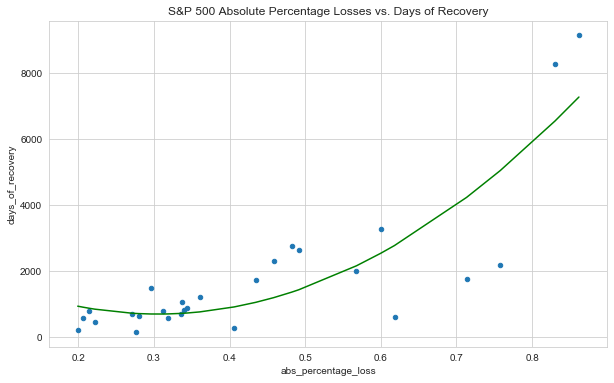

In [109]:
all_recessions_df.plot(kind='scatter', x='abs_percentage_loss', y='days_of_recovery', figsize=(10,6))
plt.plot(all_recessions_df['abs_percentage_loss'], all_recessions_df['pred_days_of_recovery2'], color='green')
plt.title(f'S&P 500 Absolute Percentage Losses vs. Days of Recovery');

### Make a prediction for the days of recovery of S&P 500 in the Covid-19 situation 

**prediction 2 (with the polynomial regression model)**

$y = b_0 + b_1 * x_1 + b_2 * x_1^2$

In [110]:
results_q.params

const                    2668.486231
abs_percentage_loss    -12965.929362
abs_per_loss_squared    21238.065595
dtype: float64

In [111]:
beta0 = results_q.params[0] # intercept
beta0

2668.4862314885168

In [112]:
beta1 = results_q.params[1]
beta1

-12965.92936175291

In [113]:
beta2 = results_q.params[2]
beta2

21238.0655948139

In [114]:
def quad_reg_model(x):
    y = beta0 + beta1 * x + beta2 * x**2
    return y

In [115]:
covid_recovery = quad_reg_model(0.339)
covid_recovery

713.7359140758886

In [116]:
print(f'''Based on our model the recovery of the S&P 500 stock price recession will take: 
 - in days: {round(covid_recovery, 2)} days, 
 - in months: {round(covid_recovery / 30, 2)} months, 
 - in years: {round(covid_recovery / 365, 2)} years''')

Based on our model the recovery of the S&P 500 stock price recession will take: 
 - in days: 713.74 days, 
 - in months: 23.79 months, 
 - in years: 1.96 years
